In [2]:
pip install nibabel

  Obtaining dependency information for nibabel from https://files.pythonhosted.org/packages/77/3f/ce43b8c2ccc4a7913a87c4d425aaf0080ea3abf947587e47dc2025981a17/nibabel-5.2.1-py3-none-any.whl.metadata
  Using cached nibabel-5.2.1-py3-none-any.whl.metadata (8.8 kB)
Using cached nibabel-5.2.1-py3-none-any.whl (3.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install split-folders

  Obtaining dependency information for split-folders from https://files.pythonhosted.org/packages/b6/d5/307d63c03356bad6e141d8718d3f4116f51bd9c4b09e2614ffcee1f3c6fd/split_folders-0.5.1-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tifffile

Note: you may need to restart the kernel to use updated packages.


In [1]:
import nibabel as nib
import numpy as np
import glob
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from tifffile import imsave

D:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

In [3]:
train_dataset_path = "dataset/"

In [18]:
test_image_1 = nib.load(train_dataset_path+'volumes/volume-1.nii').get_fdata()
# print(test_image_1.max())
test_image_1 = scalar.fit_transform(test_image_1.reshape(-1, test_image_1.shape[-1])).reshape(test_image_1.shape)
# test_image = test_image_1[56:184, 56:184, 13:141]

In [19]:
test_mask = nib.load(train_dataset_path+'segmentations/segmentation-1.nii').get_fdata()
test_mask = test_mask.astype(np.uint8)
# test_mask = test_mask[56:184, 56:184, 13:141]

In [20]:
print(np.unique(test_mask))

[0 1 2]


In [21]:
import random
n_slice = random.randint(0, test_mask.shape[2])

Text(0.5, 1.0, 'seg-1')

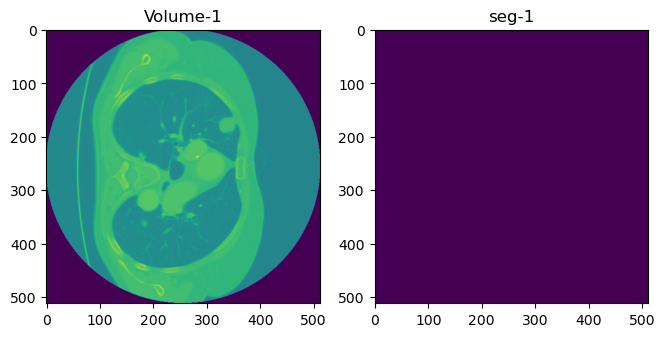

In [23]:
plt.figure(figsize=(12,8))

plt.subplot(231)
plt.imshow(test_image_1[:,:,n_slice])
plt.title("Volume-1")

plt.subplot(232)
plt.imshow(test_mask[:,:,n_slice])
plt.title("seg-1")

In [ ]:
test_mask = to_categorical(test_mask, num_classes=4)

In [5]:
import os

# Define the folder path
folder_path = r'dataset\\volumes'

# Get a list of files in the folder
files = os.listdir(folder_path)

# Sort the files based on their numerical order
files.sort(key=lambda x: int(x.split('-')[1].split('.')[0]))

# Create a list to store (filename, filepath) tuples
volume_list = []

# Populate the file_list with (filename, filepath) tuples
for file_name in files:
    # Define the full filepath
    file_path = os.path.join(folder_path, file_name)
    # Append (filename, filepath) tuple to the list
    volume_list.append(file_path)

# Print the sorted list of (filename, filepath) tuples
print(volume_list)

['dataset\\\\volumes\\volume-1.nii', 'dataset\\\\volumes\\volume-2.nii', 'dataset\\\\volumes\\volume-3.nii', 'dataset\\\\volumes\\volume-4.nii', 'dataset\\\\volumes\\volume-5.nii', 'dataset\\\\volumes\\volume-6.nii', 'dataset\\\\volumes\\volume-7.nii', 'dataset\\\\volumes\\volume-8.nii', 'dataset\\\\volumes\\volume-9.nii', 'dataset\\\\volumes\\volume-10.nii', 'dataset\\\\volumes\\volume-11.nii', 'dataset\\\\volumes\\volume-12.nii', 'dataset\\\\volumes\\volume-13.nii', 'dataset\\\\volumes\\volume-14.nii', 'dataset\\\\volumes\\volume-15.nii']


In [6]:
import os

# Define the folder path
folder_path = r'dataset\\segmentations'

# Get a list of files in the folder
files = os.listdir(folder_path)

# Sort the files based on their numerical order
files.sort(key=lambda x: int(x.split('-')[1].split('.')[0]))

# Create a list to store (filename, filepath) tuples
seg_list = []

# Populate the file_list with (filename, filepath) tuples
for file_name in files:
    # Define the full filepath
    file_path = os.path.join(folder_path, file_name)
    # Append (filename, filepath) tuple to the list
    seg_list.append(file_path)

# Print the sorted list of (filename, filepath) tuples
print(seg_list)

['dataset\\\\segmentations\\segmentation-1.nii', 'dataset\\\\segmentations\\segmentation-2.nii', 'dataset\\\\segmentations\\segmentation-3.nii', 'dataset\\\\segmentations\\segmentation-4.nii', 'dataset\\\\segmentations\\segmentation-5.nii', 'dataset\\\\segmentations\\segmentation-6.nii', 'dataset\\\\segmentations\\segmentation-7.nii', 'dataset\\\\segmentations\\segmentation-8.nii', 'dataset\\\\segmentations\\segmentation-9.nii', 'dataset\\\\segmentations\\segmentation-10.nii', 'dataset\\\\segmentations\\segmentation-11.nii', 'dataset\\\\segmentations\\segmentation-12.nii', 'dataset\\\\segmentations\\segmentation-13.nii', 'dataset\\\\segmentations\\segmentation-14.nii', 'dataset\\\\segmentations\\segmentation-15.nii']


In [28]:
for img in range(len(seg_list)):
    
    test_mask = nib.load(seg_list[img]).get_fdata()
    test_mask = scalar.fit_transform(test_mask.reshape(-1, test_mask.shape[-1])).reshape(test_mask.shape)
    
    test_image = nib.load(volume_list[img]).get_fdata()
    test_image = scalar.fit_transform(test_image.reshape(-1, test_image.shape[-1])).reshape(test_image.shape)

    #Do the same for mask
    # test_mask = test_mask[56:184, 56:184, 13:141]
    # #Do the same for mask
    # test_image = test_image[56:184, 56:184, 13:141]
    
    val, counts = np.unique(test_mask, return_counts=True)
    
    if(1 - (counts[0]/counts.sum())) > 0.01:
        print("Save me")
        test_mask = to_categorical(test_mask, num_classes=4)
        np.save('dataset/images/image_'+str(img)+'.npy', test_image)
        np.save('dataset/masks/mask_'+str(img)+'.npy', test_mask)
    else:
        print("I am useless")


Save me
Save me
Save me


OSError: 559939584 requested and 0 written

In [24]:
import splitfolders  # or import split_folders

input_folder = 'dataset/inputdata_raw'
output_folder = 'dataset/inputdata_128'
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.75, .25), group_prefix=None) # default values



Copying files: 0 files [00:00, ? files/s]

Copying files: 2 files [00:08,  4.26s/ files]

Copying files: 3 files [00:28, 10.87s/ files]

Copying files: 4 files [00:38, 10.32s/ files]

Copying files: 5 files [00:50, 11.04s/ files]

Copying files: 6 files [01:00, 10.71s/ files]

Copying files: 7 files [01:08,  9.96s/ files]

Copying files: 8 files [01:16,  9.35s/ files]

Copying files: 9 files [01:23,  8.49s/ files]

Copying files: 10 files [01:28,  7.30s/ files]

Copying files: 11 files [01:36,  7.68s/ files]

Copying files: 12 files [01:39,  6.09s/ files]

Copying files: 13 files [01:48,  7.25s/ files]

Copying files: 14 files [02:00,  8.40s/ files]

Copying files: 15 files [02:26, 13.90s/ files]

Copying files: 16 files [03:04, 21.24s/ files]

Copying files: 17 files [03:21, 19.80s/ files]

Copying files: 18 files [03:38, 18.86s/ files]

Copying files: 19 files [03:52, 17.48s/ files]

Copying files: 20 files [04:07, 16.74s/ files]

Copying files: 21 files [04:24, 16.83s/ files]

Cop

In [30]:
def load_img(img_dir, img_list):
    images=[]
    for i, image_name in enumerate(img_list):    
        if (image_name.split('.')[1] == 'npy'):
            
            image = np.load(img_dir+image_name)
                      
            images.append(image)
    images = np.array(images)
    
    return(images)



In [31]:
def imageLoader(img_dir, img_list, mask_dir, mask_list, batch_size):

    L = len(img_list)

    #keras needs the generator infinite, so we will use while true  
    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)
                       
            X = load_img(img_dir, img_list[batch_start:limit])
            Y = load_img(mask_dir, mask_list[batch_start:limit])

            yield (X,Y) #a tuple with two numpy arrays with batch_size samples     

            batch_start += batch_size   
            batch_end += batch_size

In [36]:
import random

train_img_dir = "dataset/inputdata_128/train/images/"
train_mask_dir = "dataset/inputdata_128/train/masks/"
train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

batch_size = 2

train_img_datagen = imageLoader(train_img_dir, train_img_list, train_mask_dir, train_mask_list, batch_size)

print(type(train_img_datagen))

#Verify generator.... In python 3 next() is renamed as __next__()
img, msk = train_img_datagen.__next__()

# #############################

# NEED TO CROP THE IMAGES 
# combined_x=combined_x[56:184, 56:184, 13:141] #Crop to 128x128x128x4
# Do the same for mask
# test_mask = test_mask[56:184, 56:184, 13:141]

# #############################

img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()


<class 'generator'>


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 3 dimensions. The detected shape was (2, 512, 512) + inhomogeneous part.